In [4]:
#importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

<ipython-input-4-cbc7497cf497>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [1]:
#upload do arquivo

from google.colab import files
arg = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [5]:
#Criando novo data frame

df = pd.read_excel("AdventureWorks.xlsx")

In [ ]:
#Visualizando arquivo

df.head()

In [ ]:
#Conta a quantidade de linhas e colunas do arquivo

df.shape

In [ ]:
#Verifica o tipo de dados

df.dtypes

In [ ]:
#Qual é o valor de receita total ?

df["Valor Venda"].sum()

In [7]:
#Qual o é custo total

df["custo"] = df["Custo Unitário"].mul(df["Quantidade"])

In [8]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [ ]:
#Qual seria o custo total

round(df["custo"].sum(), 2)

In [9]:
#Agora tento o valor de custo qual seria o lucro por venda ?

df["lucro"] = df["Valor Venda"] - df["custo"]

In [ ]:
df.sample(1)

In [ ]:
#Qual seria o lucro total de vendas ?

round(df["lucro"].sum(), 2)

In [10]:
#Qual foi tempo que levou para o produto ser entregue?

df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [ ]:
df.sample()

In [ ]:
df.dtypes

In [11]:
# Extraindo somente os dias do tempo de envio

df["Tempo_envio"] = (df["Tempo_envio"]).dt.days

In [ ]:
df.sample()

In [ ]:
df.dtypes

In [ ]:
df.groupby("Marca")["Tempo_envio"].mean()

# Checando células vazias

In [ ]:
#Verificando valores ausente

df.isnull().sum()

# Agrupando por ano e marca

In [12]:
# Vamos agrupar por ano e marca

df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

In [13]:
#Formando casas decimais no pandas

pd.options.display.float_format = '{:20,.2f}'.format

In [14]:
#Resetando index

lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [15]:
#Qual a quantidade de produtos vendidos

df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

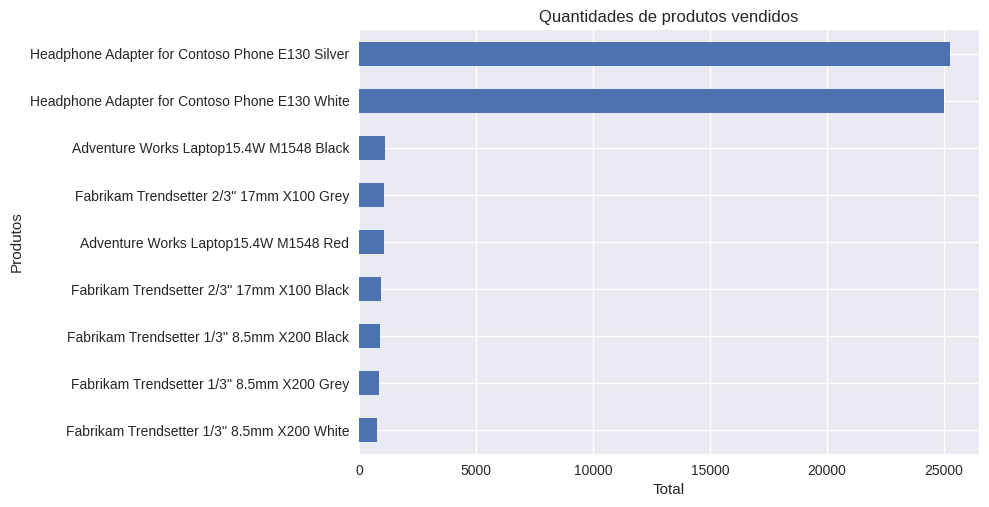

In [16]:
#Apresentando esta informação em graficos

df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = True).plot.barh(title = "Quantidades de produtos vendidos")
plt.xlabel("Total")
plt.ylabel("Produtos");

Text(0, 0.5, 'Margem de lucro')

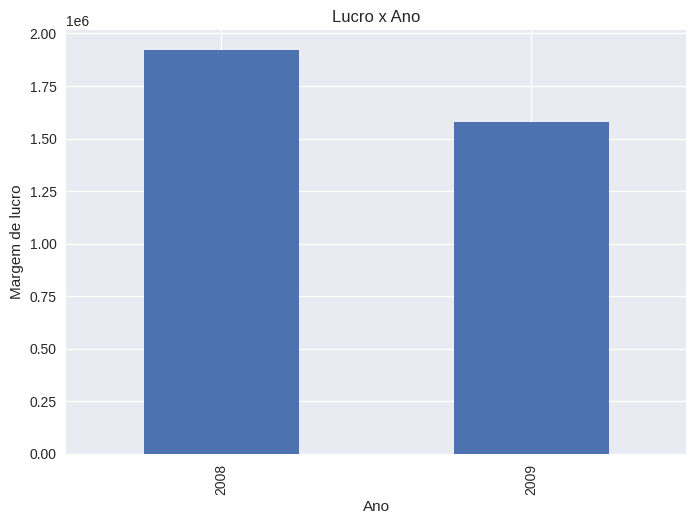

In [83]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title = "Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Margem de lucro")

In [18]:
#Analisando somente as vendas do ano de 2009

df_2009 = df[df["Data Venda"].dt.year == 2009]

In [19]:
df_2009.sample()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
792,2009-04-05,2009-04-09,307,2497,19120,200904055CS710,5.09,9.99,432,863.14,"3,452.54",Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White,"2,198.88","1,253.66",4


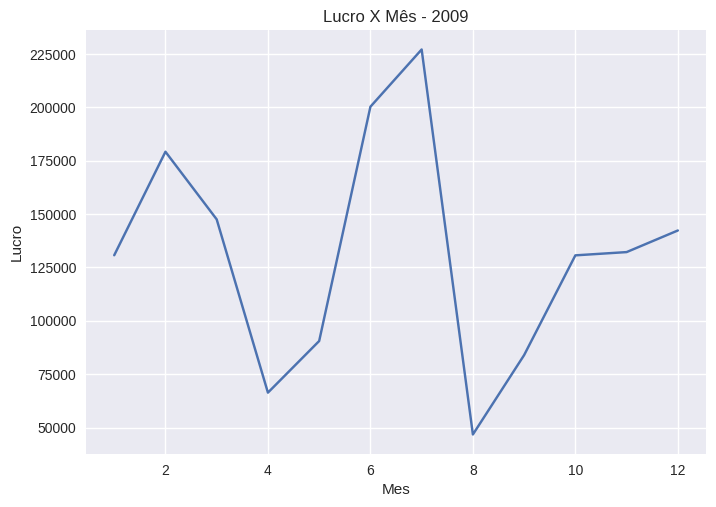

In [28]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title = "Lucro X Mês - 2009")
plt.xlabel("Mes")
plt.ylabel("Lucro");

In [ ]:
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title = "Lucro X Marca - 2009")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation = 'horizontal');

In [ ]:
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title = "Lucro X Classe - 2009")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation = 'horizontal');

In [32]:
df["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

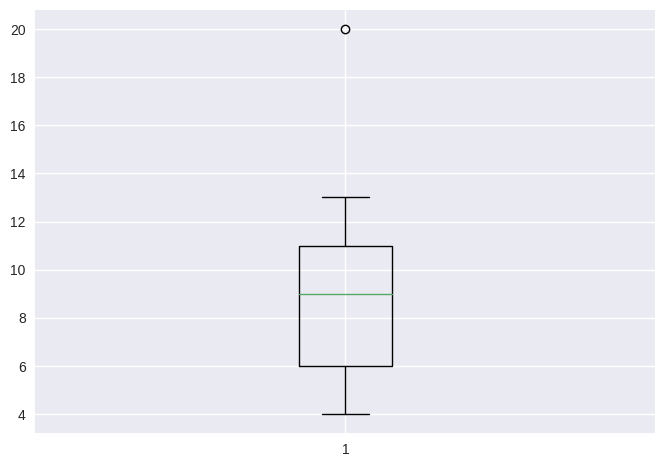

In [34]:
#Grafico em boxplot (minima x 25 x 50 x 75)

plt.boxplot(df["Tempo_envio"]);

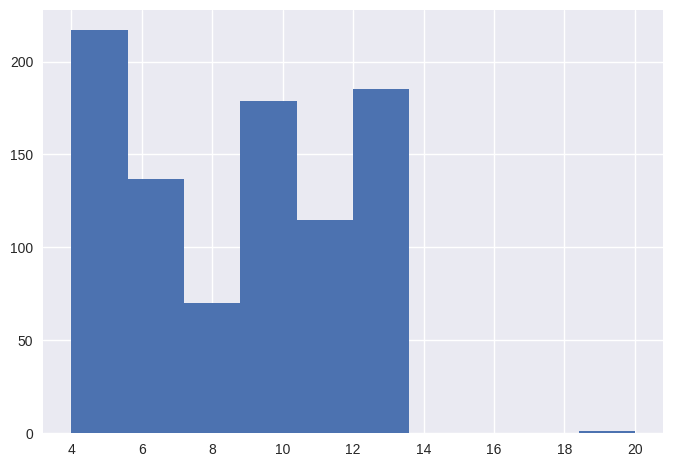

In [35]:
#Histograma do tempo de envio

plt.hist(df["Tempo_envio"]);

In [36]:
df.to_csv("df_vendas_novo.csv", index = False)